# Puzzle 11
## Part 1


--- Day 11: Dumbo Octopus ---
You enter a large cavern full of rare bioluminescent dumbo octopuses! They seem to not like the Christmas lights on your submarine, so you turn them off for now.


There are 100 octopuses arranged neatly in a 10 by 10 grid. Each octopus slowly gains **energy** over time and **flashes** brightly for a moment when its energy is full. Although your lights are off, maybe you could navigate through the cave without disturbing the octopuses if you could predict when the flashes of light will happen.


Each octopus has an **energy level** - your submarine can remotely measure the energy level of each octopus (your puzzle input). For example:
<pre>
5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526</pre>

The energy level of each octopus is a value between 0 and 9. Here, the top-left octopus has an energy level of 5, the bottom-right one has an energy level of 6, and so on.


You can model the energy levels and flashes of light in **steps**. During a single step, the following occurs:


* First, the energy level of each octopus increases by 1.
* Then, any octopus with an energy level greater than 9 **flashes**. This increases the energy level of all adjacent octopuses by 1, including octopuses that are diagonally adjacent. If this causes an octopus to have an energy level greater than 9, it **also flashes**. This process continues as long as new octopuses keep having their energy level increased beyond 9. (An octopus can only flash **at most once per step**.)
* Finally, any octopus that flashed during this step has its energy level set to 0, as it used all of its energy to flash.


Adjacent flashes can cause an octopus to flash on a step even if it begins that step with very little energy. Consider the middle octopus with 1 energy in this situation:

Before any steps:

11111<br>
19991<br>
19191<br>
19991<br>
11111<br>

After step 1:

34543<br>
4**000**4<br>
5**000**5<br>
4**000**4<br>
34543<br>

After step 2:

45654<br>
51115<br>
61116<br>
51115<br>
45654<br>

An octopus is **highlighted** when it flashed during the given step.

Here is how the larger example above progresses:

<pre>
Before any steps:
5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526

After step 1:
6594254334
3856965822
6375667284
7252447257
7468496589
5278635756
3287952832
7993992245
5957959665
6394862637

After step 2:
8807476555
5089087054
8597889608
8485769600
8700908800
6600088989
6800005943
0000007456
9000000876
8700006848</pre>

After 100 steps, there have been a total of **1656** flashes.

Given the starting energy levels of the dumbo octopuses in your cavern, simulate 100 steps. **How many total flashes are there after 100 steps?**

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from collections import Counter

plt.style.use('dark_background')

#test data
pz11_test = np.array([5483143223, 
                      2745854711,
                      5264556173,
                      6141336146,
                      6357385478,
                      4167524645,
                      2176841721,
                      6882881134,
                      4846848554,
                      5283751526])

#split each line to separate digits
pz11_test = np.array([[int(i) for i in line] for line in pz11_test.astype('str')])
pz11_test

#puzzle input
pz11_data = pd.read_csv("data/pz11.txt", header=None).values.flatten()
pz11_data = np.array([[int(i) for i in line] for line in pz11_data.astype('str')])

In [2]:
#count n flashes during x steps
def n_flashes(data, x_steps):
    #pad the data
    data_pad = np.pad(data,((1,1),(1,1)), constant_values=-9999)
    
    #grid indexes
    grid_i = [i for i in range(1,11)]
    flashes = 0
    for step in range(x_steps):
        data_pad += np.ones((12,12), dtype='int64') #step: add 1 to all elements

        if 10 in data_pad:
            
            while 10 in data_pad:
                data_pad = np.where(data_pad==10, 0, data_pad) #convert 10-s to 0-s
                
                for row_i in grid_i:
                    for col_i in grid_i:
                        r1,r2 = row_i - 1, row_i + 2
                        c1,c2 = col_i - 1, col_i + 2
                        if data_pad[row_i,col_i] == 0:
                            old_3x3 = data_pad[r1:r2,c1:c2]

                            #add increment to main matrix
                            data_pad[r1:r2,c1:c2] += np.where(old_3x3 == 0, 0, 1)
                            
                            flashes += 1
                
                #mark already flashed with -999            
                data_pad = np.where(data_pad==0,-999,data_pad)
                #cap values at 10
                data_pad = np.where(data_pad >= 10, 10, data_pad)
                
            
            data_pad[1:11,1:11] = np.where(data_pad[1:11,1:11] < 0, 0, 
                                           data_pad[1:11,1:11])
        else:
            continue
    
    print(data_pad[1:11,1:11],"\n")
    print("With %d steps %d flashes." % (x_steps, flashes))
    
n_flashes(pz11_test, 100)

[[0 3 9 7 6 6 6 8 6 6]
 [0 7 4 9 7 6 6 9 1 8]
 [0 0 5 3 9 7 6 9 3 3]
 [0 0 0 4 2 9 7 8 2 2]
 [0 0 0 4 2 2 9 8 9 2]
 [0 0 5 3 2 2 2 8 7 7]
 [0 5 3 2 2 2 2 9 6 6]
 [9 3 2 2 2 2 8 9 6 6]
 [7 9 2 2 2 8 6 8 6 6]
 [6 7 8 9 9 9 8 7 6 6]] 

With 100 steps 1656 flashes.


In [3]:
n_flashes(pz11_data, 100)

[[4 5 6 8 6 5 5 5 6 3]
 [5 7 1 1 8 6 5 5 6 6]
 [7 2 1 1 1 8 6 5 5 5]
 [0 4 2 1 1 1 8 6 5 5]
 [0 0 4 2 1 1 1 7 5 5]
 [0 0 0 4 2 1 1 8 5 5]
 [0 0 0 0 4 2 1 8 5 5]
 [0 0 0 0 0 4 2 8 5 5]
 [0 0 0 0 0 0 4 8 5 5]
 [9 0 0 0 0 0 0 7 5 5]] 

With 100 steps 1594 flashes.


## Part II
--- Part Two ---
It seems like the individual flashes aren't bright enough to navigate. However, you might have a better option: the flashes seem to be **synchronizing**!


In the example above, the first time all octopuses flash simultaneously is step 195:

<pre>
After step 193:

5877777777
8877777777
7777777777
7777777777
7777777777
7777777777
7777777777
7777777777
7777777777
7777777777

After step 194:
6988888888
9988888888
8888888888
8888888888
8888888888
8888888888
8888888888
8888888888
8888888888
8888888888

After step 195:
0000000000
0000000000
0000000000
0000000000
0000000000
0000000000
0000000000
0000000000
0000000000
0000000000
</pre>


If you can calculate the exact moments when the octopuses will all flash simultaneously, you should be able to navigate through the cavern. **What is the first step during which all octopuses flash?**

In [4]:
n_flashes(pz11_test, 195)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 

With 195 steps 3125 flashes.


In [5]:
def first_sync(data):
    #pad the data
    data_pad = np.pad(data,((1,1),(1,1)), constant_values=-9999)
    
    #grid indexes
    grid_i = [i for i in range(1,11)]
    n_flash = 0
    steps = 0
    while n_flash < 100:
        steps += 1
        data_pad += np.ones((12,12), dtype='int64') #step: add 1 to all elements

        if 10 in data_pad:
            
            while 10 in data_pad:
                data_pad = np.where(data_pad==10, 0, data_pad) #convert 10-s to 0-s
                
                for row_i in grid_i:
                    for col_i in grid_i:
                        r1,r2 = row_i - 1, row_i + 2
                        c1,c2 = col_i - 1, col_i + 2
                        if data_pad[row_i,col_i] == 0:
                            old_3x3 = data_pad[r1:r2,c1:c2]

                            #add increment to main matrix
                            data_pad[r1:r2,c1:c2] += np.where(old_3x3 == 0, 0, 1)
                
                #mark already flashed with -999            
                data_pad = np.where(data_pad==0,-999,data_pad)
                
                main_matrix = data_pad[1:11, 1:11]
                n_flash = np.sum(main_matrix < 0)
                
                if n_flash == 100:
                    break
                
                #cap values at 10
                data_pad = np.where(data_pad >= 10, 10, data_pad)
                
            
            data_pad[1:11,1:11] = np.where(data_pad[1:11,1:11] < 0, 0, 
                                           data_pad[1:11,1:11])
        else:
            continue
    
    print(data_pad[1:11,1:11],"\n")
    print("All flash at step %d" % steps)
    
first_sync(pz11_test)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 

All flash at step 195


In [6]:
first_sync(pz11_data)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 

All flash at step 437


# Puzzle 12
## Part I

--- Day 12: Passage Pathing ---
With your submarine's subterranean subsystems subsisting suboptimally, the only way you're getting out of this cave anytime soon is by finding a path yourself. Not just a path - the only way to know if you've found the **best** path is to find **all** of them.

Fortunately, the sensors are still mostly working, and so you build a rough map of the remaining caves (your puzzle input). For example:
<pre>
start-A
start-b
A-c
A-b
b-d
A-end
b-end</pre>

This is a list of how all of the caves are connected. You start in the cave named start, and your destination is the cave named end. An entry like b-d means that cave b is connected to cave d - that is, you can move between them.

So, the above cave system looks roughly like this:
<pre>
    start
    /   \
c--A-----b--d
    \   /
     end</pre>

Your goal is to find the number of distinct **paths** that start at start, end at end, and don't visit small caves more than once. There are two types of caves: **big** caves (written in uppercase, like A) and **small** caves (written in lowercase, like b). It would be a waste of time to visit any small cave more than once, but big caves are large enough that it might be worth visiting them multiple times. So, all paths you find should **visit small caves at most once**, and can **visit big caves any number of times**.

Given these rules, there are 10 paths through this example cave system:
<pre>
start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end</pre>

(Each line in the above list corresponds to a single path; the caves visited by that path are listed in the order they are visited and separated by commas.)

Note that in this cave system, cave d is never visited by any path: to do so, cave b would need to be visited twice (once on the way to cave d and a second time when returning from cave d), and since cave b is small, this is not allowed.

Here is a slightly larger example:
<pre>
dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc</pre>


The 19 paths through it are as follows:
<pre>
start,HN,dc,HN,end
start,HN,dc,HN,kj,HN,end
start,HN,dc,end
start,HN,dc,kj,HN,end
start,HN,end
start,HN,kj,HN,dc,HN,end
start,HN,kj,HN,dc,end
start,HN,kj,HN,end
start,HN,kj,dc,HN,end
start,HN,kj,dc,end
start,dc,HN,end
start,dc,HN,kj,HN,end
start,dc,end
start,dc,kj,HN,end
start,kj,HN,dc,HN,end
start,kj,HN,dc,end
start,kj,HN,end
start,kj,dc,HN,end
start,kj,dc,end</pre>

Finally, this even larger example has 226 paths through it:
<pre>
fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW</pre>


**How many paths through this cave system are there that visit small caves at most once?**

In [25]:
# build graph
def create_graph(data_path):
    """Build graph object with islower attribute.
    Parameters
    ----------
    data_path : str
        String path to data file.

    Returns
    -------
    NetworkX Graph object."""

    # read data into DF
    df = pd.read_csv(data_path, sep='\n', header=None)
    df = df[0].str.split("-", n=1, expand=True).\
        rename(columns={0:"source",1:"target"})

    # create graph from df
    G = nx.from_pandas_edgelist(df)

    # assign islower attribute [bool]
    unique_nodes = set(pd.concat([df['source'],df['target']]))

    for node in unique_nodes:
        G.nodes[node]['isupper'] = node.isupper()

    return G

def traverse_graph_1(graph):
    paths=[]
    # traverse graph
    def traverse_graph_active(graph, path=['start']):
        """Recursive loop through graph object for
        finding unique paths from 'start' to 'end'.

        Parameters
        ----------
        graph : networkx graph object
        path : list of already visited nodes

        Returns
        -------
        paths : list of all possible paths
        len(paths) : number of paths
        """
        for node in graph.neighbors(path[-1]):
            if graph.nodes[node]['isupper'] or not node in path:
                if node == 'end':
                    paths.append(path + ['end'])
                else: 
                    traverse_graph_active(graph, path + [node])
        return paths
    
    
    paths_copy = traverse_graph_active(graph).copy()
    paths.clear # clear paths variable
    return paths_copy
    
# full run
def pz12_1(data_path, print_paths=False):
    paths12_1 = traverse_graph_1(create_graph(data_path))
    
    print(f"Number of paths: {len(paths12_1)}")
    
    if print_paths:
        print("")
        for path in paths12_1:
            print(path)

In [28]:
# test data 1
pz12_1("data/pz12_test2.txt", True)
print("")

# test data 2
pz12_1("data/pz12_test.txt")
print("")

# test data 3
pz12_1("data/pz12_test3.txt")

Number of paths:10

['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'end']
['start', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'end']
['start', 'b', 'end']

Number of paths:19

Number of paths:226


In [29]:
# aoc data part 1
pz12_1("data/pz12.txt")

Number of paths:4104


## Part II

--- Part Two ---
After reviewing the available paths, you realize you might have time to visit a **single small cave twice**. Specifically, big caves can be visited any number of times, a single small cave can be visited at most twice, and the remaining small caves can be visited at most once. However, the caves named start and end can only be visited **exactly once each**: once you leave the start cave, you may not return to it, and once you reach the end cave, the path must end immediately.

Now, the 36 possible paths through the first example above are:
<pre>
start,A,b,A,b,A,c,A,end
start,A,b,A,b,A,end
start,A,b,A,b,end
start,A,b,A,c,A,b,A,end
start,A,b,A,c,A,b,end
start,A,b,A,c,A,c,A,end
start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,d,b,A,c,A,end
start,A,b,d,b,A,end
start,A,b,d,b,end
start,A,b,end
start,A,c,A,b,A,b,A,end
start,A,c,A,b,A,b,end
start,A,c,A,b,A,c,A,end
start,A,c,A,b,A,end
start,A,c,A,b,d,b,A,end
start,A,c,A,b,d,b,end
start,A,c,A,b,end
start,A,c,A,c,A,b,A,end
start,A,c,A,c,A,b,end
start,A,c,A,c,A,end
start,A,c,A,end
start,A,end
start,b,A,b,A,c,A,end
start,b,A,b,A,end
start,b,A,b,end
start,b,A,c,A,b,A,end
start,b,A,c,A,b,end
start,b,A,c,A,c,A,end
start,b,A,c,A,end
start,b,A,end
start,b,d,b,A,c,A,end
start,b,d,b,A,end
start,b,d,b,end
start,b,end</pre>

The slightly larger example above now has 103 paths through it, and the even larger example now has 3509 paths through it.

Given these new rules, **how many paths through this cave system are there?**

In [61]:
def traverse_graph_2(graph):
    paths=[]
    # traverse graph
    def traverse_graph_active(graph, path=['start']):
        """Recursive loop through graph object for
        finding unique paths from 'start' to 'end'.

        Parameters
        ----------
        graph : networkx graph object
        path : list of already visited nodes

        Returns
        -------
        paths : list of all possible paths
        len(paths) : number of paths
        """
        for node in graph.neighbors(path[-1]):
            if node == 'start':
                continue
            visited = max(Counter([n for n in path if n.islower()]).values())
            if graph.nodes[node]['isupper'] or not node in path or visited < 2:
                if node == 'end':
                    paths.append(path + ['end'])
                else: 
                    traverse_graph_active(graph, path + [node])
        return paths
    
    
    paths_copy = traverse_graph_active(graph).copy()
    paths.clear # clear paths variable
    return paths_copy

# full run
def pz12_2(data_path, print_paths=False):
    paths12_2 = traverse_graph_2(create_graph(data_path))
    
    print(f"Number of paths: {len(paths12_2)}")
    
    if print_paths:
        print("")
        for path in paths12_2:
            print(path)
            
pz12_2("data/pz12_test2.txt", True)

Number of paths: 36

['start', 'A', 'c', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'd', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'd', 'b', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'end']
['start', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'd', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'd', 'b', 'A', 'end']
['start', 'A', 'b', 'd', 'b

In [63]:
# slightly larger set
pz12_2("data/pz12_test.txt")
print("")
# largest test set
pz12_2("data/pz12_test3.txt")

Number of paths: 103

Number of paths: 3509


In [64]:
# aoc part ii data
pz12_2("data/pz12.txt")

Number of paths: 119760


# Puzzle 13
## Part I

--- Day 13: Transparent Origami ---


You reach another volcanically active part of the cave. It would be nice if you could do some kind of thermal imaging so you could tell ahead of time which caves are too hot to safely enter.


Fortunately, the submarine seems to be equipped with a thermal camera! When you activate it, you are greeted with:


Congratulations on your purchase! To activate this infrared thermal imaging
camera system, please enter the code found on page 1 of the manual.
Apparently, the Elves have never used this feature. To your surprise, you manage to find the manual; as you go to open it, page 1 falls out. It's a large sheet of transparent paper! The transparent paper is marked with random dots and includes instructions on how to fold it up (your puzzle input). For example:

<pre>
6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5</pre>


The first section is a list of dots on the transparent paper. 0,0 represents the top-left coordinate. The first value, x, increases to the right. The second value, y, increases downward. So, the coordinate 3,0 is to the right of 0,0, and the coordinate 0,7 is below 0,0. The coordinates in this example form the following pattern, where # is a dot on the paper and . is an empty, unmarked position:

<pre>
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
...........
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........
</pre>

Then, there is a list of **fold instructions**. Each instruction indicates a line on the transparent paper and wants you to fold the paper **up** (for horizontal y=... lines) or **left** (for vertical x=... lines). In this example, the first fold instruction is fold along y=7, which designates the line formed by all of the positions where y is 7 (marked here with -):

<pre>
...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
-----------
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........</pre>


Because this is a horizontal line, fold the bottom half **up**. Some of the dots might end up overlapping after the fold is complete, but dots will never appear exactly on a fold line. The result of doing this fold looks like this:

<pre>
#.##..#..#.
#...#......
......#...#
#...#......
.#.#..#.###
...........
...........</pre>


Now, only 17 dots are visible.


Notice, for example, the two dots in the bottom left corner before the transparent paper is folded; after the fold is complete, those dots appear in the top left corner (at 0,0 and 0,1). Because the paper is transparent, the dot just below them in the result (at 0,3) remains visible, as it can be seen through the transparent paper.

Also notice that some dots can end up **overlapping**; in this case, the dots merge together and become a single dot.


The second fold instruction is fold along x=5, which indicates this line:

<pre>
#.##.|#..#.
#...#|.....
.....|#...#
#...#|.....
.#.#.|#.###
.....|.....
.....|.....</pre>


Because this is a vertical line, fold left:

<pre>
#####
#...#
#...#
#...#
#####
.....
.....</pre>


The instructions made a square!


The transparent paper is pretty big, so for now, focus on just completing the first fold. After the first fold in the example above, 17 dots are visible - dots that end up overlapping after the fold is completed count as a single dot.


**How many dots are visible after completing just the first fold instruction on your transparent paper?**


In [103]:
#read in test data
pz13_test = pd.read_csv("data/pz13_test.txt", header=None,
                        names=['x','y'])

#extract coordinates
pz13_test_xy = pz13_test.iloc[:18,:]

#extract instructions
pz13_test_folds = pz13_test[['x']].tail(2)
pz13_test_folds = pz13_test_folds['x'].str.\
                  extract(r"(x|y)\=(\d*)").reset_index(drop=True).\
                  rename(columns={0:'xy', 1:'folds'})

#read in real data
pz13_data = pd.read_csv("data/pz13.txt", header=None,
                        names=['x','y'])

In [104]:
def n_dots(data_df, folds_n=-1):
    
    #extract coordinates
    data_xy = data_df[data_df.iloc[:,1].notna()].astype('int64') 

    #extract instructions
    data_folds = data_df[data_df.iloc[:,1].isna()].iloc[:,0]\
                 .str.extract(r"(x|y)\=(\d*)").reset_index(drop=True)\
                 .rename(columns={0:'x_or_y',1:'val'})
    
    data_folds['val'] = data_folds.val.astype('int64')
    
    #find grid size via max element
    n_rows = data_xy.max().y
    n_cols = data_xy.max().x
    
    #init matrix
    matrix = np.zeros((n_rows+1, n_cols+1), dtype='int64')
    
    #create dots on matrix
    cols = data_xy.x.values
    rows = data_xy.y.values
    for row,col in zip(rows,cols):
        matrix[row,col] = 1
    
    #fold matrix
    x_or_y = data_folds["x_or_y"].values 
    fold_vals = data_folds['val'].values
    
    
    n = None #number of folds
    
    if folds_n == -1:
        n = len(x_or_y)
    if folds_n >= 0:
        n = folds_n
    
    for i,(axis, val) in enumerate(zip(x_or_y[:n],fold_vals[:n])):
        if axis == "y":
            top = matrix[:val,:]
            bottom_flip = np.flip(matrix[val+1:,:],axis=0)
            matrix = top + bottom_flip
        else:
            left = matrix[:,:val]
            right_flip = np.flip(matrix[:,val+1:], axis=1)
            matrix = left + right_flip
    
    #find number of dots on the board
    dots_n = np.where(matrix > 1, 1, matrix).sum()
    print("After %d folds there are %d dots." % (n, dots_n))
n_dots(pz13_test, 1)

After 1 folds there are 17 dots.


In [105]:
n_dots(pz13_data, 1)

After 1 folds there are 818 dots.


## Part II
--- Part Two ---
Finish folding the transparent paper according to the instructions. The manual says the code is always **eight capital letters**.


**What code do you use to activate the infrared thermal imaging camera system?**

In [117]:
def find_code(data_df, folds_n=-1):
    
    #extract coordinates
    data_xy = data_df[data_df.iloc[:,1].notna()].astype('int64') 

    #extract instructions
    data_folds = data_df[data_df.iloc[:,1].isna()].iloc[:,0]\
                 .str.extract(r"(x|y)\=(\d*)").reset_index(drop=True)\
                 .rename(columns={0:'x_or_y',1:'val'})
    
    data_folds['val'] = data_folds.val.astype('int64')
    
    #find grid size via max element
    n_rows = data_xy.max().y
    n_cols = data_xy.max().x
    
    #init matrix
    matrix = np.zeros((n_rows+1, n_cols+1), dtype='int64')
    
    #create dots on matrix
    cols = data_xy.x.values
    rows = data_xy.y.values
    for row,col in zip(rows,cols):
        matrix[row,col] = 1
    
    #fold matrix
    x_or_y = data_folds["x_or_y"].values 
    fold_vals = data_folds['val'].values
    
    
    n = None #number of folds
    
    if folds_n == -1:
        n = len(x_or_y)
    if folds_n >= 0:
        n = folds_n
    
    for i,(axis, val) in enumerate(zip(x_or_y[:n],fold_vals[:n])):
        if axis == "y":
            top = matrix[:val,:]
            bottom_flip = np.flip(matrix[val+1:,:],axis=0)
            matrix = top + bottom_flip
            matrix = np.where(matrix > 1, 1, matrix)
        else:
            left = matrix[:,:val]
            right_flip = np.flip(matrix[:,val+1:], axis=1)
            matrix = left + right_flip
            matrix = np.where(matrix > 1, 1, matrix)
    
    matrix_file = np.where(matrix > 0, "#", ".")
    dummy = pd.DataFrame(matrix_file).to_csv("answers/pz13_2.txt", sep=" ",
                                        header=False, index=False)
find_code(pz13_data)

# Puzzle 14
## Part I

--- Day 14: Extended Polymerization ---

The incredible pressures at this depth are starting to put a strain on your submarine. The submarine has polymerization equipment that would produce suitable materials to reinforce the submarine, and the nearby volcanically-active caves should even have the necessary input elements in sufficient quantities.

The submarine manual contains instructions for finding the optimal polymer formula; specifically, it offers a **polymer template** and a list of **pair insertion** rules (your puzzle input). You just need to work out what polymer would result after repeating the pair insertion process a few times.

For example:
<pre>
NNCB

CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C</pre>

The first line is the **polymer template** - this is the starting point of the process.

The following section defines the **pair insertion** rules. A rule like AB -> C means that when elements A and B are immediately adjacent, element C should be inserted between them. These insertions all happen simultaneously.

So, starting with the polymer template NNCB, the first step simultaneously considers all three pairs:

* The first pair (NN) matches the rule NN -> C, so element C is inserted between the first N and the second N.
* The second pair (NC) matches the rule NC -> B, so element B is inserted between the N and the C.
* The third pair (CB) matches the rule CB -> H, so element H is inserted between the C and the B.


Note that these pairs overlap: the second element of one pair is the first element of the next pair. Also, because all pairs are considered simultaneously, inserted elements are not considered to be part of a pair until the next step.

After the first step of this process, the polymer becomes NCNBCHB.

Here are the results of a few steps using the above rules:
<pre>
Template:     NNCB
After step 1: NCNBCHB
After step 2: NBCCNBBBCBHCB
After step 3: NBBBCNCCNBBNBNBBCHBHHBCHB
After step 4: NBBNBNBBCCNBCNCCNBBNBBNBBBNBBNBBCBHCBHHNHCBBCBHCB</pre>

This polymer grows quickly. After step 5, it has length 97; After step 10, it has length 3073. After step 10, B occurs 1749 times, C occurs 298 times, H occurs 161 times, and N occurs 865 times; taking the quantity of the most common element (B, 1749) and subtracting the quantity of the least common element (H, 161) produces 1749 - 161 = 1588.


Apply 10 steps of pair insertion to the polymer template and find the most and least common elements in the result. **What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?**

In [148]:
from collections import Counter

#import test data
pz14_test = pd.read_csv("data/pz14_test.txt", sep=r"\s->\s",
                        header=None, engine='python', skiprows=2,
                        names=['key', 'val'])

pz14_test_templ = pd.read_csv("data/pz14_test.txt", header=None,
                              nrows=1)[0].values[0]
#import data
pz14_data = pd.read_csv("data/pz14.txt", sep=r"\s->\s",
                        header=None, engine='python', skiprows=2,
                        names=['key', 'val'])

pz14_templ = pd.read_csv("data/pz14.txt", header=None,
                         nrows=1)[0].values[0]

In [205]:
def polymerization(df, template, n_steps=1):
    
    #create dict of pairs
    insert_dict = {k:v for k,v in zip(df.key,df.val)}
    
    for step in range(n_steps):
        templ = "%s" % template
        templ = [char for char in templ]
        templ_len = len(templ)
        loc = 1
        for i, char in enumerate(template):
            if i == templ_len - 1:
                break
            templ.insert(loc, insert_dict[char + template[i+1]]) 
            loc += 2
        
        template = "".join(templ)
    
    #most & least common letter quantities
    most_char_qty = Counter(template).most_common()[0][1]
    least_char_qty = Counter(template).most_common()[-1][1]
    
    most_least_sep = most_char_qty - least_char_qty
    print("Most common qty - least common qty:", most_least_sep)

polymerization(pz14_test, pz14_test_templ, n_steps=10)

Most common qty - least common qty: 1588


In [158]:
polymerization(pz14_data, pz14_templ, n_steps=10)

Most common qty - least common qty: 2068


## Part II

--- Part Two ---
The resulting polymer isn't nearly strong enough to reinforce the submarine. You'll need to run more steps of the pair insertion process; a total of **40 steps** should do it.

In the above example, the most common element is B (occurring 2192039569602 times) and the least common element is H (occurring 3849876073 times); subtracting these produces 2188189693529.

Apply **40** steps of pair insertion to the polymer template and find the most and least common elements in the result. **What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?**

In [231]:
def polymerization_v2(df, template, n_steps):
    
    #create dict of pair to letter
    letter_dict = {k:v for k,v in zip(df.key,df.val)}
    
    #create dict of pair to "list of 2 pairs"
    pair_dict = {k:[k[0] + v,v + k[1]] for k,v in letter_dict.items()}
    
    #create dummy dict with all pairs init 0 count
    pair_val_dict = {k:0 for k,v in letter_dict.items()}
    
    #find initial polymer pairs
    init_pairs = [template[i:i+2] for i in range(len(template) - 1)]
    
    #create initial dict of polymer pair counts
    init_dict = dict(Counter(init_pairs))
    
    final_dict = {**init_dict}
    for step in range(n_steps):
        step_val_dict = {**pair_val_dict}
        for k,v in final_dict.items():
            step_val_dict[pair_dict[k][0]] += v
            step_val_dict[pair_dict[k][1]] += v
        
        final_dict = step_val_dict
    
    #all unique letters
    unique_letters = list(set([letter for letter in df.val.values]))
    
    #create empty dict for letter counts
    letter_counts = {letter:0 for letter in unique_letters}
  
    for k,v in final_dict.items():
        letter_counts[k[0]] += v
        letter_counts[k[1]] += v
    
    final_counts = {}
    for k,v in letter_counts.items():
        if k == template[0] or k == template[-1]:
            final_counts[k] = int((v+1) / 2)
        else:
            final_counts[k] = int(v / 2)
    
    final_np = list(final_counts.values())
    most_minus_last = max(final_np) - min(final_np)

    print("Most common qty - least common qty:", most_minus_last)

polymerization_v2(pz14_test, pz14_test_templ, n_steps=40)

Most common qty - least common qty: 2188189693529


In [234]:
polymerization_v2(pz14_data, pz14_templ, n_steps=40)

Most common qty - least common qty: 2158894777814


# Puzzle 15
## Part I

--- Day 15: Chiton ---
You've almost reached the exit of the cave, but the walls are getting closer together. Your submarine can barely still fit, though; the main problem is that the walls of the cave are covered in chitons, and it would be best not to bump any of them.

The cavern is large, but has a very low ceiling, restricting your motion to two dimensions. The shape of the cavern resembles a square; a quick scan of chiton density produces a map of **risk level** throughout the cave (your puzzle input). For example:
<pre>
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581</pre>

You start in the top left position, your destination is the bottom right position, and you cannot move diagonally. The number at each position is its risk level; to determine the total risk of an entire path, add up the risk levels of each position you enter (that is, don't count the risk level of your starting position unless you enter it; leaving it adds no risk to your total).

Your goal is to find a path with the **lowest total risk**. In this example, a path with the lowest total risk is highlighted here:

**1**163751742<br>
**1**381373672<br>
**2136511**328<br>
369493**15**69<br>
7463417**1**11<br>
1319128**13**7<br>
13599124**2**1<br>
31254216**3**9<br>
12931385**21**<br>
231194458**1**<br>

The total risk of this path is **40** (the starting position is never entered, so its risk is not counted).

**What is the lowest total risk of any path from the top left to the bottom right?**

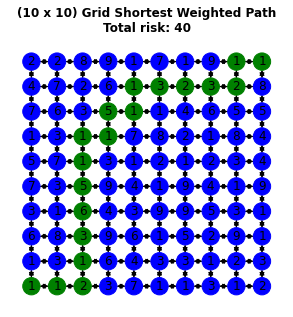

In [2]:
def graph_min_risk(data_file, draw=True, figsize=(5,5)):
    
    # load data into numpy flatten array
    data = pd.read_csv(data_file, header=None).values.flatten()
    data = np.array([[int(i) for i in line] for line in data.astype('str')])
    
    # matrix shape m x n
    m = data.shape[0]
    n = data.shape[1]

    ob = [-1, m]
    D = nx.DiGraph()
    for i, j in np.ndindex(data.shape):
        
        all_neighbors = [(i,j+1), (i+1,j), (i,j-1), (i-1,j)]
        valid_neighbors = [i for i in all_neighbors if not any(x in i for x in ob)]
        
        for neighbor in valid_neighbors:
            D.add_edge((i,j), neighbor, weight=data[i,j])

    # find shortest path list of nodes
    shortest_path = nx.dijkstra_path(D, source=(0,0), target=(m-1, n-1))
    lowest_risk = sum([data[node] for node in shortest_path if node != (0,0)])
    
    if draw:
        # add face value attribute 
        for node in D.nodes():
            D.nodes[node]['val'] = data[node]
            D.nodes[node]['pos'] = node

        # highlight shortest path with green color
        color_map = ['green' if node in shortest_path else 'blue' for node in D]

        plt.figure(figsize=figsize)
        plt.title(f"({m} x {n}) Grid Shortest Weighted Path\nTotal risk: {lowest_risk}", 
                  c='Black', weight='bold')

        pos = nx.get_node_attributes(D, 'pos')
        edge_labels = nx.get_edge_attributes(D, 'weight')

        nx.draw(D, pos, labels=nx.get_node_attributes(D, 'val'), node_color=color_map)
        #nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
        plt.show()
    else:
        print(f"({m} x {n}) Grid Shortest Weighted Path\nTotal risk: {lowest_risk}")
    
graph_min_risk("data/pz15_test.txt") 

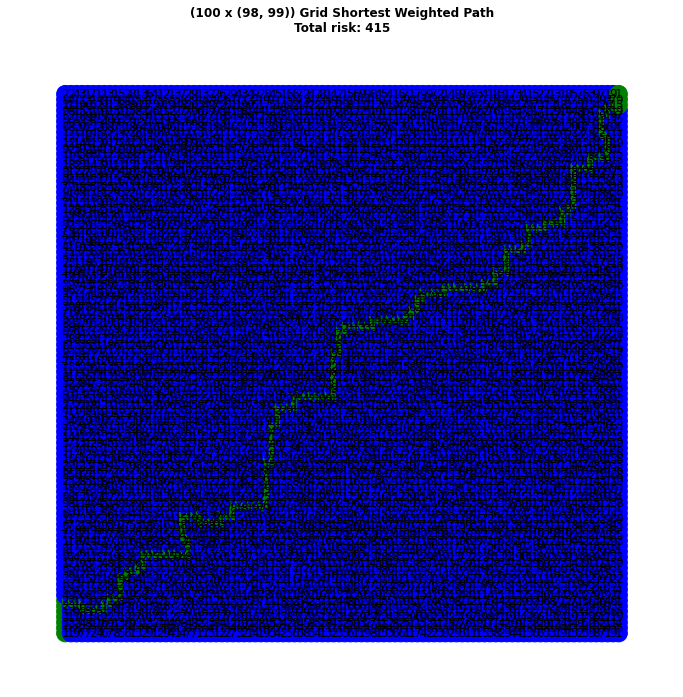

In [110]:
#graph_min_risk("data/pz15.txt", (12,12))

## Part II
--- Part Two ---
Now that you know how to find low-risk paths in the cave, you can try to find your way out.

The entire cave is actually **five times larger in both dimensions** than you thought; the area you originally scanned is just one tile in a 5x5 tile area that forms the full map. Your original map tile repeats to the right and downward; each time the tile repeats to the right or downward, all of its risk levels **are 1 higher** than the tile immediately up or left of it. However, risk levels above 9 wrap back around to 1. So, if your original map had some position with a risk level of 8, then that same position on each of the 25 total tiles would be as follows:
<pre>
8 9 1 2 3
9 1 2 3 4
1 2 3 4 5
2 3 4 5 6
3 4 5 6 7</pre>

Each single digit above corresponds to the example position with a value of 8 on the top-left tile. Because the full map is actually five times larger in both dimensions, that position appears a total of 25 times, once in each duplicated tile, with the values shown above.

Here is the full five-times-as-large version of the first example above, with the original map in the top left corne2r highlighted:
<pre>
11637517422274862853338597396444961841755517295286
13813736722492484783351359589446246169155735727126
21365113283247622439435873354154698446526571955763
36949315694715142671582625378269373648937148475914
74634171118574528222968563933317967414442817852555
13191281372421239248353234135946434524615754563572
13599124212461123532357223464346833457545794456865
31254216394236532741534764385264587549637569865174
12931385212314249632342535174345364628545647573965
23119445813422155692453326671356443778246755488935
22748628533385973964449618417555172952866628316397
24924847833513595894462461691557357271266846838237
32476224394358733541546984465265719557637682166874
47151426715826253782693736489371484759148259586125
85745282229685639333179674144428178525553928963666
24212392483532341359464345246157545635726865674683
24611235323572234643468334575457944568656815567976
42365327415347643852645875496375698651748671976285
23142496323425351743453646285456475739656758684176
34221556924533266713564437782467554889357866599146
33859739644496184175551729528666283163977739427418
35135958944624616915573572712668468382377957949348
43587335415469844652657195576376821668748793277985
58262537826937364893714847591482595861259361697236
96856393331796741444281785255539289636664139174777
35323413594643452461575456357268656746837976785794
35722346434683345754579445686568155679767926678187
53476438526458754963756986517486719762859782187396
34253517434536462854564757396567586841767869795287
45332667135644377824675548893578665991468977611257
44961841755517295286662831639777394274188841538529
46246169155735727126684683823779579493488168151459
54698446526571955763768216687487932779859814388196
69373648937148475914825958612593616972361472718347
17967414442817852555392896366641391747775241285888
46434524615754563572686567468379767857948187896815
46833457545794456865681556797679266781878137789298
64587549637569865174867197628597821873961893298417
45364628545647573965675868417678697952878971816398
56443778246755488935786659914689776112579188722368
55172952866628316397773942741888415385299952649631
57357271266846838237795794934881681514599279262561
65719557637682166874879327798598143881961925499217
71484759148259586125936169723614727183472583829458
28178525553928963666413917477752412858886352396999
57545635726865674683797678579481878968159298917926
57944568656815567976792667818781377892989248891319
75698651748671976285978218739618932984172914319528
56475739656758684176786979528789718163989182927419
67554889357866599146897761125791887223681299833479</pre>

Equipped with the full map, you can now find a path from the top left corner to the bottom right corner with the lowest total risk:
<pre>
11637517422274862853338597396444961841755517295286
13813736722492484783351359589446246169155735727126
21365113283247622439435873354154698446526571955763
36949315694715142671582625378269373648937148475914
74634171118574528222968563933317967414442817852555
13191281372421239248353234135946434524615754563572
13599124212461123532357223464346833457545794456865
31254216394236532741534764385264587549637569865174
12931385212314249632342535174345364628545647573965
23119445813422155692453326671356443778246755488935
22748628533385973964449618417555172952866628316397
24924847833513595894462461691557357271266846838237
32476224394358733541546984465265719557637682166874
47151426715826253782693736489371484759148259586125
85745282229685639333179674144428178525553928963666
24212392483532341359464345246157545635726865674683
24611235323572234643468334575457944568656815567976
42365327415347643852645875496375698651748671976285
23142496323425351743453646285456475739656758684176
34221556924533266713564437782467554889357866599146
33859739644496184175551729528666283163977739427418
35135958944624616915573572712668468382377957949348
43587335415469844652657195576376821668748793277985
58262537826937364893714847591482595861259361697236
96856393331796741444281785255539289636664139174777
35323413594643452461575456357268656746837976785794
35722346434683345754579445686568155679767926678187
53476438526458754963756986517486719762859782187396
34253517434536462854564757396567586841767869795287
45332667135644377824675548893578665991468977611257
44961841755517295286662831639777394274188841538529
46246169155735727126684683823779579493488168151459
54698446526571955763768216687487932779859814388196
69373648937148475914825958612593616972361472718347
17967414442817852555392896366641391747775241285888
46434524615754563572686567468379767857948187896815
46833457545794456865681556797679266781878137789298
64587549637569865174867197628597821873961893298417
45364628545647573965675868417678697952878971816398
56443778246755488935786659914689776112579188722368
55172952866628316397773942741888415385299952649631
57357271266846838237795794934881681514599279262561
65719557637682166874879327798598143881961925499217
71484759148259586125936169723614727183472583829458
28178525553928963666413917477752412858886352396999
57545635726865674683797678579481878968159298917926
57944568656815567976792667818781377892989248891319
75698651748671976285978218739618932984172914319528
56475739656758684176786979528789718163989182927419
67554889357866599146897761125791887223681299833479</pre>

The total risk of this path is **315**(the starting position is still never entered, so its risk is not counted).

Using the full map, **what is the lowest total risk of any path from the top left to the bottom right?**

In [55]:
def graph_min_risk_expanded(data_file):
    
    # load data into numpy flatten array
    data = pd.read_csv(data_file, header=None).values.flatten()
    data = np.array([[int(i) for i in line] for line in data.astype('str')])
    
    # expand data by m x n
    data = np.concatenate([data + i for i in range(5)], axis=0)
    data = np.concatenate([data + i for i in range(5)], axis=1)
    data[data > 9] -= 9

    # matrix shape m x n
    m, n = data.shape[0], data.shape[1]
    
    ob = [-1, m]
    D = nx.DiGraph()
    for i, j in np.ndindex(data.shape):
        
        all_neighbors = [(i,j+1), (i+1,j), (i,j-1), (i-1,j)]
        valid_neighbors = [i for i in all_neighbors if not any(x in i for x in ob)]
        
        for neighbor in valid_neighbors:
            D.add_edge((i,j), neighbor, weight=data[i,j])

    # find shortest path list of nodes
    #lowest_risk = nx.dijkstra_path_length(D, source=(0,0), target=(m-1, n-1))
    
    # find shortest path list of nodes
    shortest_path = nx.dijkstra_path(D, source=(0,0), target=(m-1, n-1))
    lowest_risk = sum([data[node] for node in shortest_path if node != (0,0)])
    
    print(f"({m} x {n}) Grid Shortest Weighted Path\nTotal risk: {lowest_risk}")
    
graph_min_risk_expanded("data/pz15_test.txt")

(50 x 50) Grid Shortest Weighted Path
Total risk: 315


In [56]:
graph_min_risk_expanded("data/pz15.txt")

(500 x 500) Grid Shortest Weighted Path
Total risk: 2864
